In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
# Help with this notebook and other notebooks came from kaggle
#https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch
#https://www.kaggle.com/code/arkhanzada/eeg-brain-signals-emotion-classification
#https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'deeplearning:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4654608%2F7920775%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240328%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240328T054540Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7060d6d6c60ea3ad9b1d9e66794ecad2eaece7238550d93f59396d25de5b470593b9a1017906a957f27fe06d69f50419a4d2511008dfeb79e790dfcdde43346dc0509ea2515dd9087b99e4e02d3a523d247a937c97aa9a6b36ba37b0a827cccb5f30784a2da393347a17ecbb09a8ecd1709c2edc35047a8cd44a53ede2f7df074f4dee844f8c118f90d3590dc2783394b9220bdfea7339b68072c33dfacc184f10a3abdcc524212bcaeff3cd8924ddae2e2c0f61621cba7bbbe7c6356c42640dd2362e17ca3eab5614f6d335e66151a95aea1ab72b4029f4d675ed68133910647e840ea67377ddd3a291ba5e32ccf896bd09c1c4ea2f6ff6257a9313e4d868ef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deeplearning/dataset_WL_CW_Y.npy
/kaggle/input/deeplearning/dataset_WL_CW_X.npy


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as scio
from sklearn.decomposition import PCA
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
try:
    import mne
    print("mne is already installed")
except ModuleNotFoundError:
    !pip install mne
try:
    import ipywidgets
    print("ipywidgets is already installed")
except ModuleNotFoundError:
    !pip install ipywidgets
from ipywidgets import interact, widgets
from scipy.signal import welch
import pandas as pd

mne is already installed
ipywidgets is already installed


In [ ]:
#Load data in
file_path = '/kaggle/input/deeplearning/dataset_WL_CW_X.npy'
file_path = '/kaggle/input/deeplearning/dataset_WL_CW_Y.npy'

#your_data_array = np.load(file_path)
X = np.load('/kaggle/input/deeplearning/dataset_WL_CW_X.npy')
X2 = np.load('/kaggle/input/deeplearning/dataset_WL_CW_X.npy')
label = np.load('/kaggle/input/deeplearning/dataset_WL_CW_Y.npy')
label2 = np.load('/kaggle/input/deeplearning/dataset_WL_CW_Y.npy')
print(X.shape)
print(label.shape)
print(label)

(62, 512, 360)
(1, 360)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [ ]:

if label2.shape[0] != 2:
  label2 = np.zeros((2, 360))
  label2[0, :] = label[0, :]
  label2[1, :] = 1 - label[0, :]
  print(label2[:, :15])
  print(label2.shape)
else:
  print("Label already changed \n",label2.shape, "\n",label2[:, :312])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
(2, 360)


# CNN w/o preprocessing

(62, 512, 360)
(360, 2)
X_data:  torch.Size([62, 512, 360])
y_data:  torch.Size([360, 2])
Epoch: 1, Train Loss: 1.0268, Val Loss: 0.3816, Val Accuracy: 0.5278
Epoch: 2, Train Loss: 0.3047, Val Loss: 0.2738, Val Accuracy: 0.5833
Epoch: 3, Train Loss: 0.2376, Val Loss: 0.2647, Val Accuracy: 0.7222
Epoch: 4, Train Loss: 0.1868, Val Loss: 0.2573, Val Accuracy: 0.7917
Epoch: 5, Train Loss: 0.1484, Val Loss: 0.2200, Val Accuracy: 0.7778
Epoch: 6, Train Loss: 0.1110, Val Loss: 0.2100, Val Accuracy: 0.7500
Epoch: 7, Train Loss: 0.0897, Val Loss: 0.2145, Val Accuracy: 0.8611
Epoch: 8, Train Loss: 0.0636, Val Loss: 0.1822, Val Accuracy: 0.8472
Epoch: 9, Train Loss: 0.0487, Val Loss: 0.1952, Val Accuracy: 0.8333
Epoch: 10, Train Loss: 0.0385, Val Loss: 0.1769, Val Accuracy: 0.8472
Epoch: 11, Train Loss: 0.0278, Val Loss: 0.1940, Val Accuracy: 0.8472
Epoch: 12, Train Loss: 0.0256, Val Loss: 0.1719, Val Accuracy: 0.8472
Epoch: 13, Train Loss: 0.0469, Val Loss: 0.1745, Val Accuracy: 0.8333
Epoch: 14

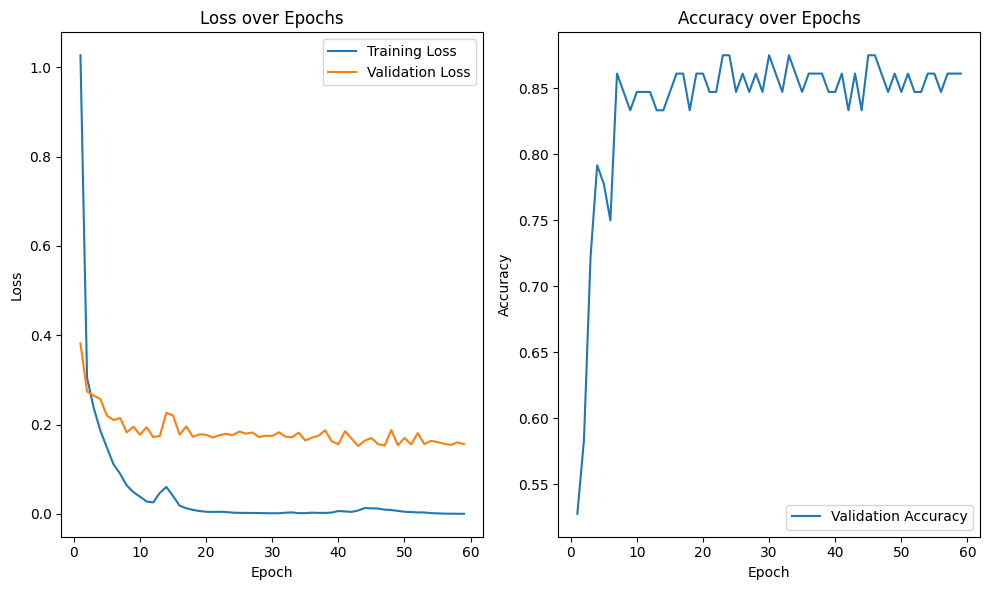

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming your data is in numpy arrays: X_data (62, 512, 360) and y_data (360, 2)
X_data = X.copy()
print(X_data.shape)
y_data = label2.copy().T
print(y_data.shape)

# Convert data to PyTorch tensors
X_data = torch.from_numpy(X_data).float()
print("X_data: ", X_data.shape)
y_data = torch.from_numpy(y_data).float()
print("y_data: ", y_data.shape)

# Reshape X_data for time series format (samples, channels, time_steps)
X_data = X_data.permute(2, 0, 1)  # Reshape from (X, Y, Z) to (Z, X, Y) (360, 62, 512)

# Create a PyTorch dataset
dataset = TensorDataset(X_data, y_data)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=62, out_channels=32, kernel_size=3, padding=1)  # Set in_channels=62
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * (512 // 4), 128)  # Adjust the input size based on the output shape after pooling
        self.fc2 = nn.Linear(128, y_data.shape[1])  # Adjust the output size to match the number of target values

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * (512 // 4))  # Corrected line
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

import matplotlib.pyplot as plt

# Create lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

## Training loop
num_epochs = 300
patience = 16
best_val_loss = float('inf')
for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0

    # Training
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            labels = torch.argmax(labels, dim=1)  # Convert one-hot labels to indices
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

        val_accuracy = total_correct / total_samples
        val_accuracies.append(val_accuracy)

    # Print statistics
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    # Store loss values
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

# Evaluate on the validation set
model.eval()
with torch.no_grad():
    total_correct = 0
    total_samples = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        labels = torch.argmax(labels, dim=1)  # Convert one-hot labels to indices
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    val_accuracy = total_correct / total_samples
    print(f'Final Validation Accuracy: {val_accuracy:.4f}')

# Plot loss and accuracy over epochs
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()